In [1]:
!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.9/2.9 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 313.0/313.0 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 35.0/35.0 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 95.1/95.1 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rembg 2.0.30 requires opencv-python-headless~=4.6.0.66, but you have opencv-python-headless 4.5.4.60 which is incompatible.


In [3]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [14]:
IMAGE_PATH = 'sign.png'

In [15]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256296390029),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9719649866726915),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683973478739152)]

In [7]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

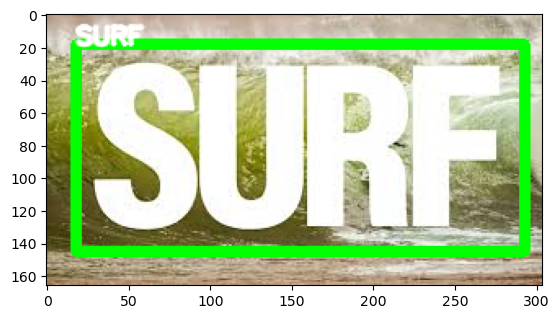

In [8]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img = cv2.putText(img, text, top_left, font, .5, (255,255,255),2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

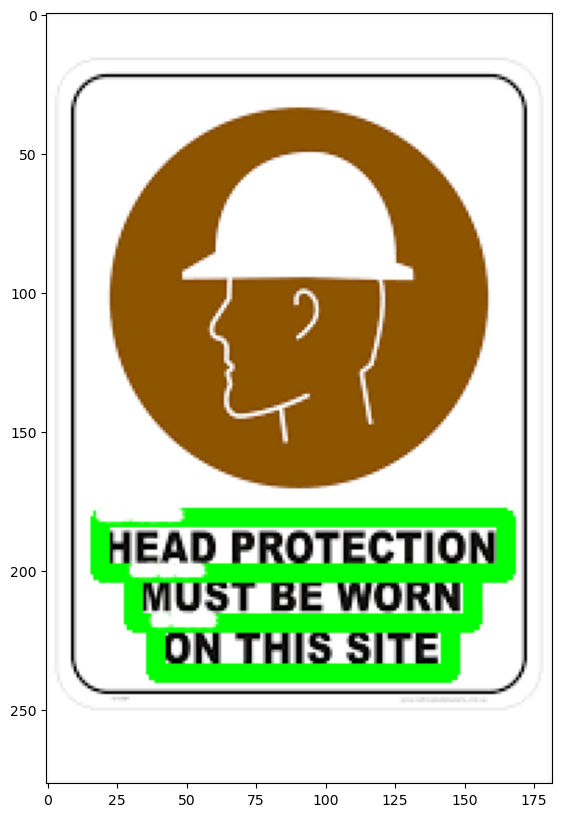

In [20]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
    img = cv2.putText(img, text, top_left, font, 0.1, (255,255,255),2, cv2.LINE_AA)
    
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()